# UFO Sightings

## Import UFO data set

In [128]:
# import packages

import pandas as pd
import matplotlib.pyplot as plt
import re


In [129]:
df = pd.read_csv('complete.csv')

In [130]:
# Check data frame typ
type(df)

pandas.core.frame.DataFrame

In [131]:
df.head()

,day,month,year,date,time,city,state,country,shape,duration (seconds),duration (hours/min),comments,latitude,longitude
0,10,10,1949,10/10/1949,20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,29.883056,-97.941111
1,10,10,1949,10/10/1949,21:00:00,lackland afb,tx,us,light,7200.0,1-2 hrs,1949 Lackland AFB TX. Lights racing across th...,29.384210,-98.581082
2,10,10,1955,10/10/1955,17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester England,53.200000,-2.916667
3,10,10,1956,10/10/1956,21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,28.978333,-96.645833
4,10,10,1960,10/10/1960,20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611


In [132]:
# Check data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79119 entries, 0 to 79118
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   day                   79119 non-null  int64  
 1   month                 79119 non-null  int64  
 2   year                  79119 non-null  int64  
 3   date                  79119 non-null  object 
 4   time                  79119 non-null  object 
 5   city                  79119 non-null  object 
 6   state                 72798 non-null  object 
 7   country               68862 non-null  object 
 8   shape                 79119 non-null  object 
 9   duration (seconds)    79119 non-null  float64
 10  duration (hours/min)  79119 non-null  object 
 11  comments              79111 non-null  object 
 12  latitude              79119 non-null  float64
 13  longitude             79119 non-null  float64
dtypes: float64(3), int64(3), object(8)
memory usage: 8.5+ MB


## Check sightings by year

In [133]:
# Check for NaN and null

df['year'].isna().value_counts()

False    79119
Name: year, dtype: int64

In [134]:
# create df for the year

year = df['year'].value_counts()

year

2012    7298
2013    6966
2011    5064
2008    4773
2009    4482
        ... 
1934       1
1906       1
1910       1
1916       1
1920       1
Name: year, Length: 87, dtype: int64

<BarContainer object of 87 artists>

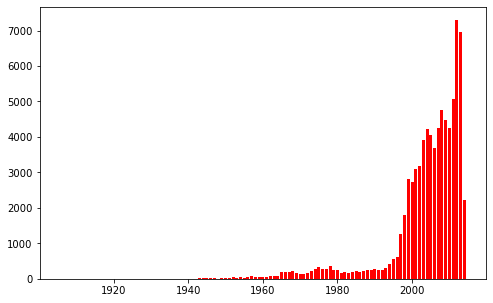

In [135]:
# Plot bar graph of the sightings by year and predict next decade

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x = year.index, height = year, color = 'red')

- There are more sightings of UFOs after 2000, which suggests UFOs are visiting more often, or is more likely to be a results of improved communications and the internet. 

## Check sightings by country

In [136]:
# Check for NaN and null

df['country'].isna().value_counts()

False    68862
True     10257
Name: country, dtype: int64

In [137]:
# change city colum to string

df['city'] = df['city'].astype('str')
# check

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79119 entries, 0 to 79118
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   day                   79119 non-null  int64  
 1   month                 79119 non-null  int64  
 2   year                  79119 non-null  int64  
 3   date                  79119 non-null  object 
 4   time                  79119 non-null  object 
 5   city                  79119 non-null  object 
 6   state                 72798 non-null  object 
 7   country               68862 non-null  object 
 8   shape                 79119 non-null  object 
 9   duration (seconds)    79119 non-null  float64
 10  duration (hours/min)  79119 non-null  object 
 11  comments              79111 non-null  object 
 12  latitude              79119 non-null  float64
 13  longitude             79119 non-null  float64
dtypes: float64(3), int64(3), object(8)
memory usage: 8.5+ MB


In [138]:
df.head()

,day,month,year,date,time,city,state,country,shape,duration (seconds),duration (hours/min),comments,latitude,longitude
0,10,10,1949,10/10/1949,20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,29.883056,-97.941111
1,10,10,1949,10/10/1949,21:00:00,lackland afb,tx,us,light,7200.0,1-2 hrs,1949 Lackland AFB TX. Lights racing across th...,29.384210,-98.581082
2,10,10,1955,10/10/1955,17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester England,53.200000,-2.916667
3,10,10,1956,10/10/1956,21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,28.978333,-96.645833
4,10,10,1960,10/10/1960,20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611


In [139]:
# get the country from city column - anything between brackets is a country

df['city_country'] = df['city'].str.extract('.*\((.*)\).*')


In [140]:
# Check dataframe

df.head()

,day,month,year,date,time,city,state,country,shape,duration (seconds),duration (hours/min),comments,latitude,longitude,city_country
0,10,10,1949,10/10/1949,20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,29.883056,-97.941111,NaN
1,10,10,1949,10/10/1949,21:00:00,lackland afb,tx,us,light,7200.0,1-2 hrs,1949 Lackland AFB TX. Lights racing across th...,29.384210,-98.581082,NaN
2,10,10,1955,10/10/1955,17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester England,53.200000,-2.916667,uk/england
3,10,10,1956,10/10/1956,21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,28.978333,-96.645833,NaN
4,10,10,1960,10/10/1960,20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,NaN


In [141]:
# Check values from the city_country column

df['city_country'].unique()

array([nan, 'uk/england', 'uk/wales', ..., 'darren lake theme park',
       'entire west coast', 'hollyridge'], dtype=object)

In [145]:
# If the () has a country name then popluate the country column with acronym. 

def names(data): 
    if "uk" in df['city_country']:
        data['country'] = 'test'
    elif "canada" in data['city_country']:
        data['country'] = 'test'
    elif "new zealand" in data['city_country']:
        data['country'] = 'test'
    elif "france" in data['city_country']:
        data['country'] = 'test'
    else:
        data['country'] = data['country']
    return data

df = names(df)

df.head(50)

,day,month,year,date,time,city,state,country,shape,duration (seconds),duration (hours/min),comments,latitude,longitude,city_country
0,10,10,1949,10/10/1949,20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,29.883056,-97.941111,NaN
1,10,10,1949,10/10/1949,21:00:00,lackland afb,tx,us,light,7200.0,1-2 hrs,1949 Lackland AFB TX. Lights racing across th...,29.384210,-98.581082,NaN
2,10,10,1955,10/10/1955,17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester England,53.200000,-2.916667,uk/england
3,10,10,1956,10/10/1956,21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,28.978333,-96.645833,NaN
4,10,10,1960,10/10/1960,20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,NaN
5,10,10,1961,10/10/1961,19:00:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,NaN
6,10,10,1965,10/10/1965,21:00:00,penarth (uk/wales),NaN,gb,circle,180.0,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,51.434722,-3.180000,uk/wales
7,10,10,1965,10/10/1965,23:45:00,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,41.117500,-73.408333,NaN
8,10,10,1966,10/10/1966,20:00:00,pell city,al,us,disk,180.0,3 minutes,Strobe Lighted disk shape object observed clos...,33.586111,-86.286111,NaN
9,10,10,1966,10/10/1966,21:00:00,live oak,fl,us,disk,120.0,several minutes,Saucer zaps energy from powerline as my pregna...,30.294722,-82.984167,NaN


In [144]:
# Check all values from 'country' and change names

df['country'].unique()

array(['us', 'gb', 'be', 'ca', 'nz', 'ru', 'au', 'it', nan, 'li', 'no',
       'de', 'ic', 'me', 'ja', 'pe', 'vi', 'tu', 'ch', 'hk', 'gr', 'pol',
       'uk', 'uae', 'ar', 'sp', 'in', 'fr', 'sa', 'se', 'pu', 'ho', 'roi',
       'ir', 'ne', 'po', 'tr', 'is', 'th', 'ma', 'sk'], dtype=object)

In [118]:
# Change acronym to country

df.loc[df['country'] == 'us', 'country'] = 'USA'
df.loc[df['country'] == 'gb', 'country'] = 'Great Britian'
df.loc[df['country'] == 'ca', 'country'] = 'Canada'
df.loc[df['country'] == 'nz', 'country'] = 'New Zealand'
df.loc[df['country'] == 'ru', 'country'] = 'Russia'
df.loc[df['country'] == 'au', 'country'] = 'Australia'
df.loc[df['country'] == 'it', 'country'] = 'Italy'
df.loc[df['country'] == 'li', 'country'] = 'Lithuania'
df.loc[df['country'] == 'no', 'country'] = 'Norway'
df.loc[df['country'] == 'de', 'country'] = 'Denmark'
df.loc[df['country'] == 'ic', 'country'] = 'Iceland'
df.loc[df['country'] == 'me', 'country'] = 'Mexico'
df.loc[df['country'] == 'ja', 'country'] = 'Japan'
df.loc[df['country'] == 'pe', 'country'] = 'Peru'
df.loc[df['country'] == 'vi', 'country'] = 'Vietnam'
df.loc[df['country'] == 'tu', 'country'] = 'Turkey'
df.loc[df['country'] == 'ch', 'country'] = 'China'
df.loc[df['country'] == 'hk', 'country'] = 'Hong Kong'
df.loc[df['country'] == 'gr', 'country'] = 'Greece'
df.loc[df['country'] == 'sp', 'country'] = 'Spain'
df.loc[df['country'] == 'uae', 'country'] = 'UAE'
df.loc[df['country'] == 'fr', 'country'] = 'France'
df.loc[df['country'] == 'ar', 'country'] = 'Argentina'
df.loc[df['country'] == 'in', 'country'] = 'India'
df.loc[df['country'] == 'sa', 'country'] = 'South Africa'
df.loc[df['country'] == 'se', 'country'] = 'Serbia'
df.loc[df['country'] == 'pu', 'country'] = 'Puerto Rico'
df.loc[df['country'] == 'ir', 'country'] = 'Ireland'
df.loc[df['country'] == 'po', 'country'] = 'Portugal'
df.loc[df['country'] == 'ne', 'country'] = 'Netherlands'
df.loc[df['country'] == 'tr', 'country'] = 'Trinidad and Tobago'
df.loc[df['country'] == 'ne', 'country'] = 'Netherlands'
df.loc[df['country'] == 'is', 'country'] = 'Israel'
df.loc[df['country'] == 'th', 'country'] = 'Thailand'
df.loc[df['country'] == 'ma', 'country'] = 'Malaysia'
df.loc[df['country'] == 'sk', 'country'] = 'South Korea'
df.loc[df['country'] == 'ho', 'country'] = 'Honduras'
df.loc[df['country'] == 'roi', 'country'] = 'Republic of Ireland'
df.loc[df['country'] == 'na', 'country'] = 'Namibia'

In [119]:
# Check changes 

df['country'].unique()

array(['USA', 'Great Britian', 'be', 'Canada', 'New Zealand', 'Russia',
       'Australia', 'Italy', nan, 'Lithuania', 'Norway', 'Denmark',
       'Iceland', 'Mexico', 'Japan', 'Peru', 'Vietnam', 'Turkey', 'China',
       'Hong Kong', 'Greece', 'pol', 'UAE', 'Argentina', 'Spain', 'India',
       'France', 'South Africa', 'Serbia', 'Puerto Rico', 'Honduras',
       'Republic of Ireland', 'Ireland', 'Netherlands', 'Portugal',
       'Trinidad and Tobago', 'Israel', 'Thailand', 'Malaysia',
       'South Korea'], dtype=object)

## Check geographical location

In [10]:
# Remove longitude and latitude without co-ordinates

df = df[df['latitude'] != 0]

In [15]:
# Check latitude column

df['latitude'] == 0.all()

SyntaxError: invalid syntax (<ipython-input-15-2a2af47b355e>, line 3)

## Most common shape

In [87]:
df['shape'].unique()

array(['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'cigar', 'rectangle', 'chevron',
       'triangle', 'formation', 'delta', 'changing', 'egg', 'flash',
       'diamond', 'teardrop', 'cone', 'cross', 'pyramid', 'round',
       'crescent', 'flare', 'hexagon', 'dome'], dtype=object)

In [ ]:
# Plot bar graph of the sightings by year and predict next decade

fig, axs = plt.subplots(figsize=(12, 4)) 

axs.df['shape'].plot()